In [36]:
load('.RData')

In [48]:
library(ggplot2)
library(ggpubr)
library(FactoMineR)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [38]:
head(df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,k2,k3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,7.6,0.23,0.34,1.6,43.00,24,129,0.99305,3.12,0.70,10.4,medium,w,2,1
2,8.2,0.22,0.36,6.8,34.00,12,90,0.99440,3.01,0.38,10.5,good,w,2,1
3,8.0,0.67,0.30,2.0,0.06,38,62,0.99580,3.26,0.56,10.2,medium,r,1,2
4,8.2,0.23,0.29,1.8,47.00,47,187,0.99330,3.13,0.50,10.2,medium,w,2,1
5,7.2,0.31,0.46,5.0,0.04,3,29,0.99060,3.04,0.53,12.5,poor,w,1,2
6,6.8,0.18,0.21,5.4,53.00,34,104,0.99445,3.30,0.43,9.4,medium,w,2,1


In [39]:
createBoxPlot <- function(variable, clase){
    p1 <- ggplot(df, aes_string(x = clase, y = variable, fill = clase)) + 
            geom_boxplot() +
            theme_bw() +
            theme(axis.title.x = element_blank()) +
            coord_flip()
    p1
}

In [40]:
createHistogramPlot <- function(variable, clase){
    p1 <- ggplot(df, aes_string(x = variable)) + 
            geom_histogram(aes_string(fill = clase), 
                           alpha = 0.7, 
                           position = 'identity', bins = 30) +
            theme_bw()
    p1
}

In [41]:
createFig <- function(variable, clase){
                ggarrange(createBoxPlot(variable, clase), 
                createHistogramPlot(variable, clase), 
                nrow = 2, ncol = 1, common.legend  = TRUE, legend = 'top', align = 'hv')
}

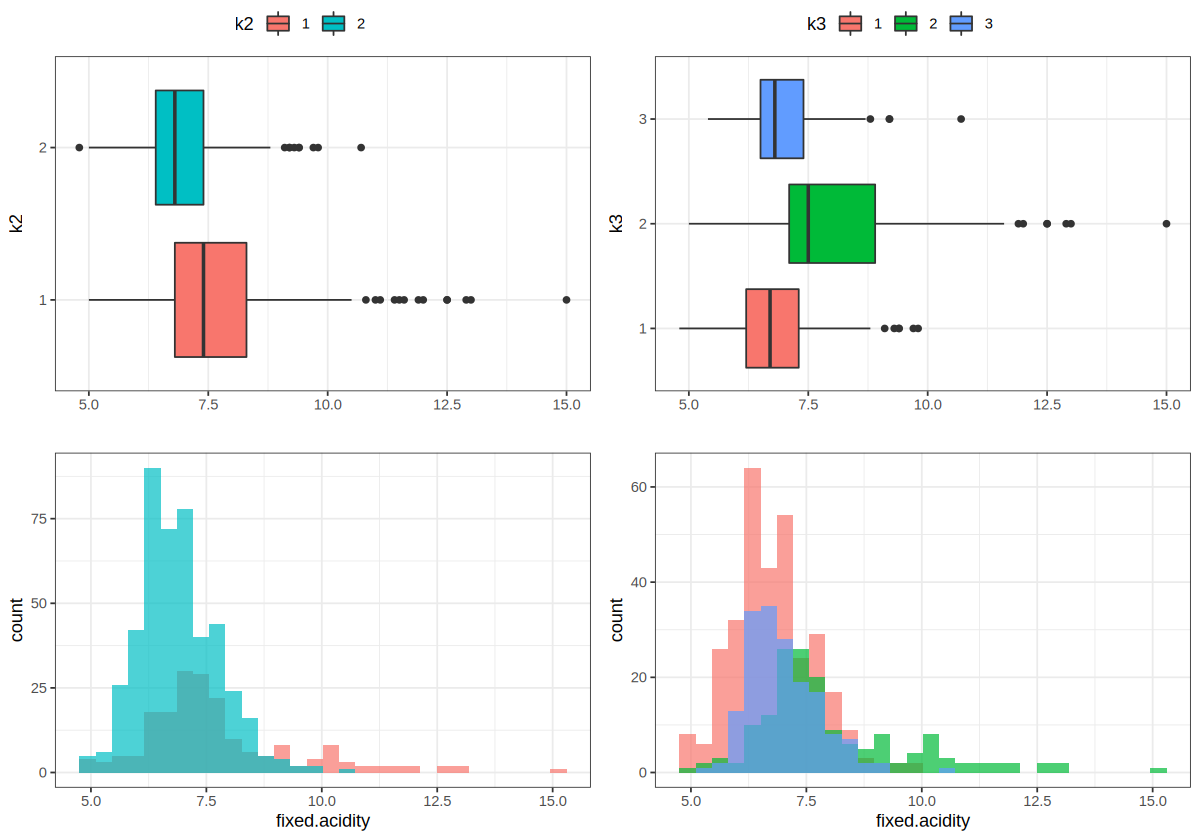

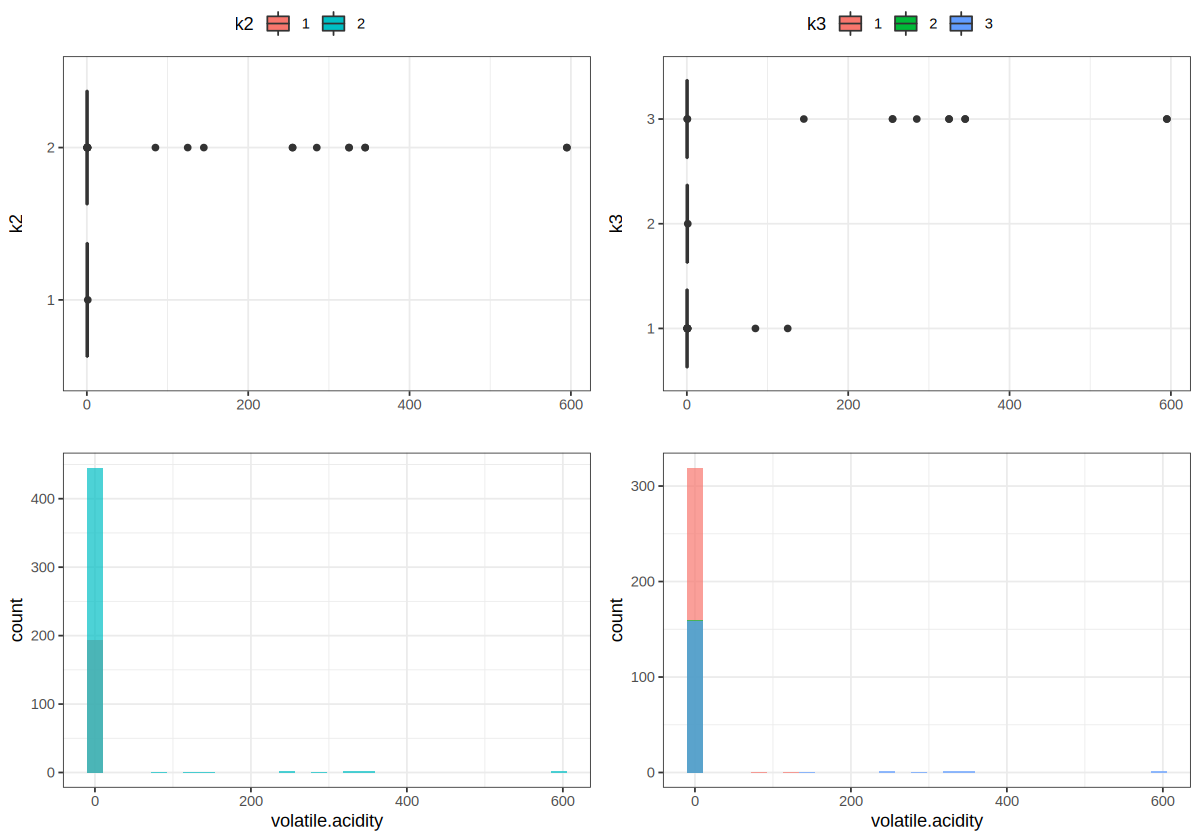

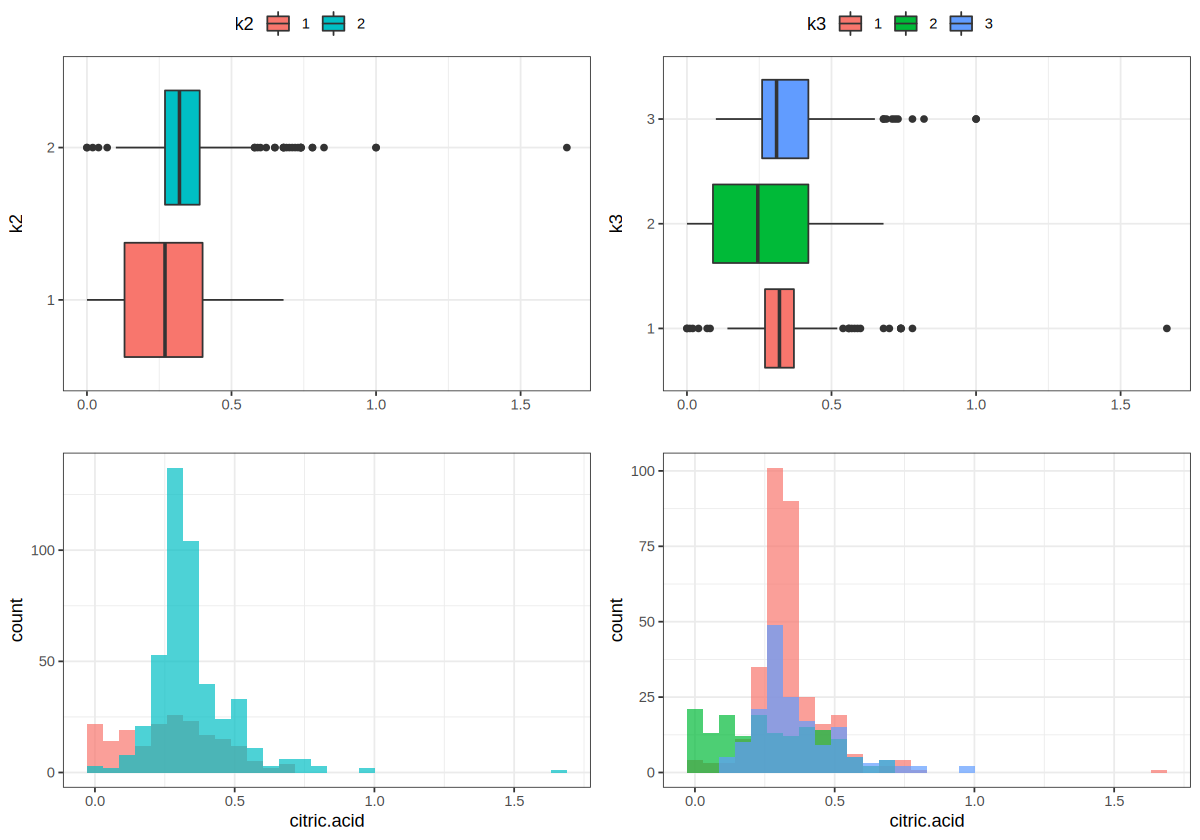

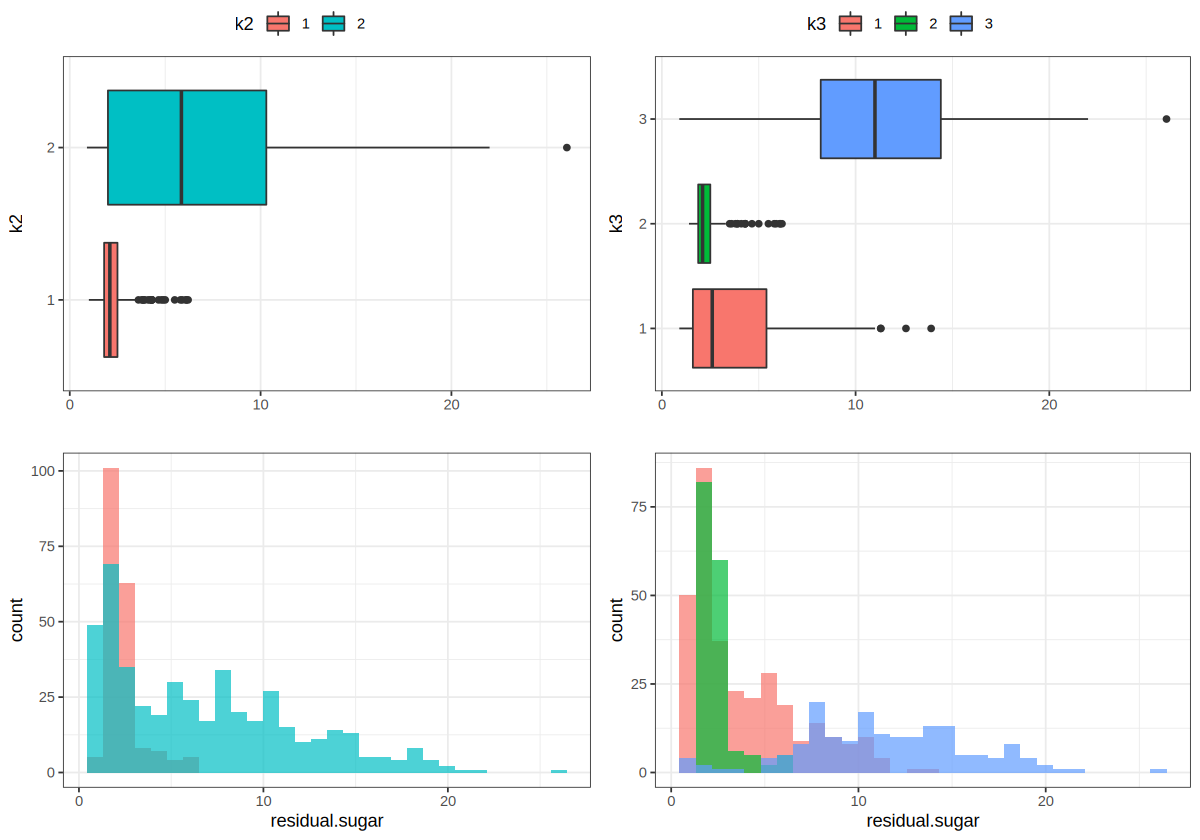

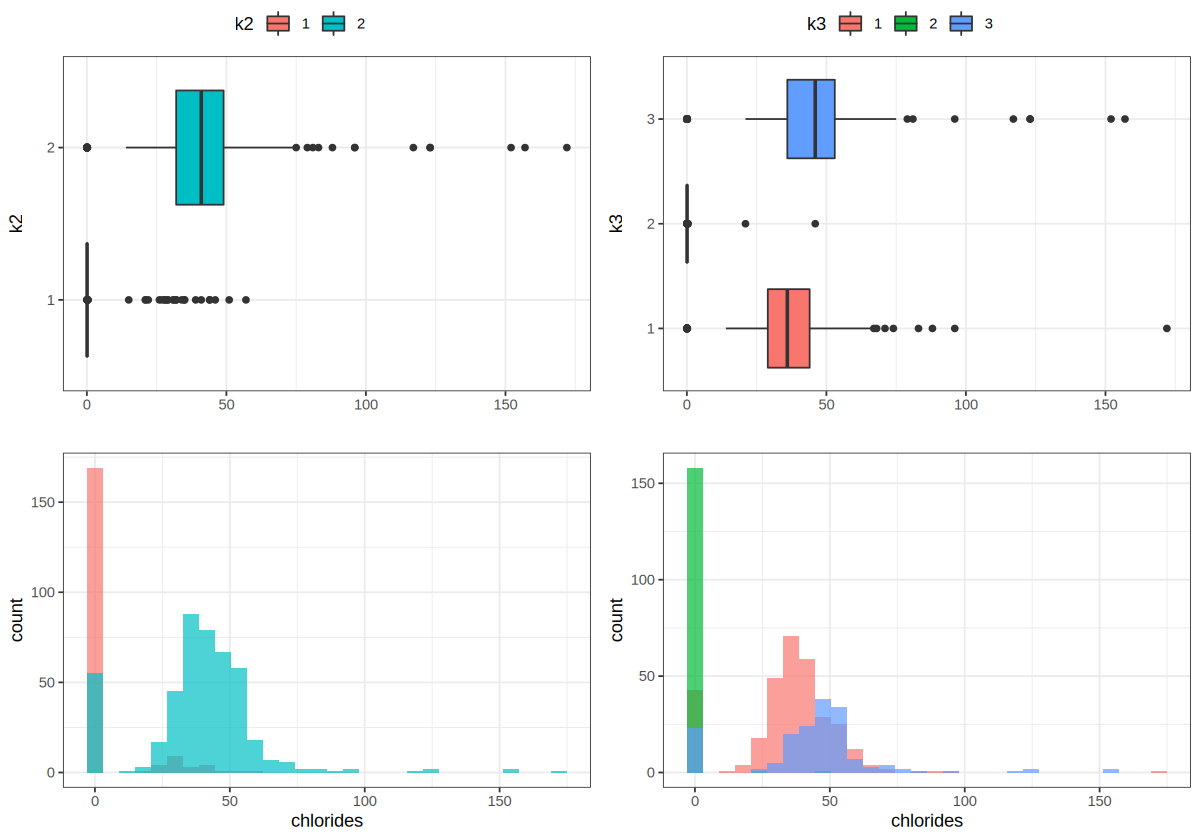

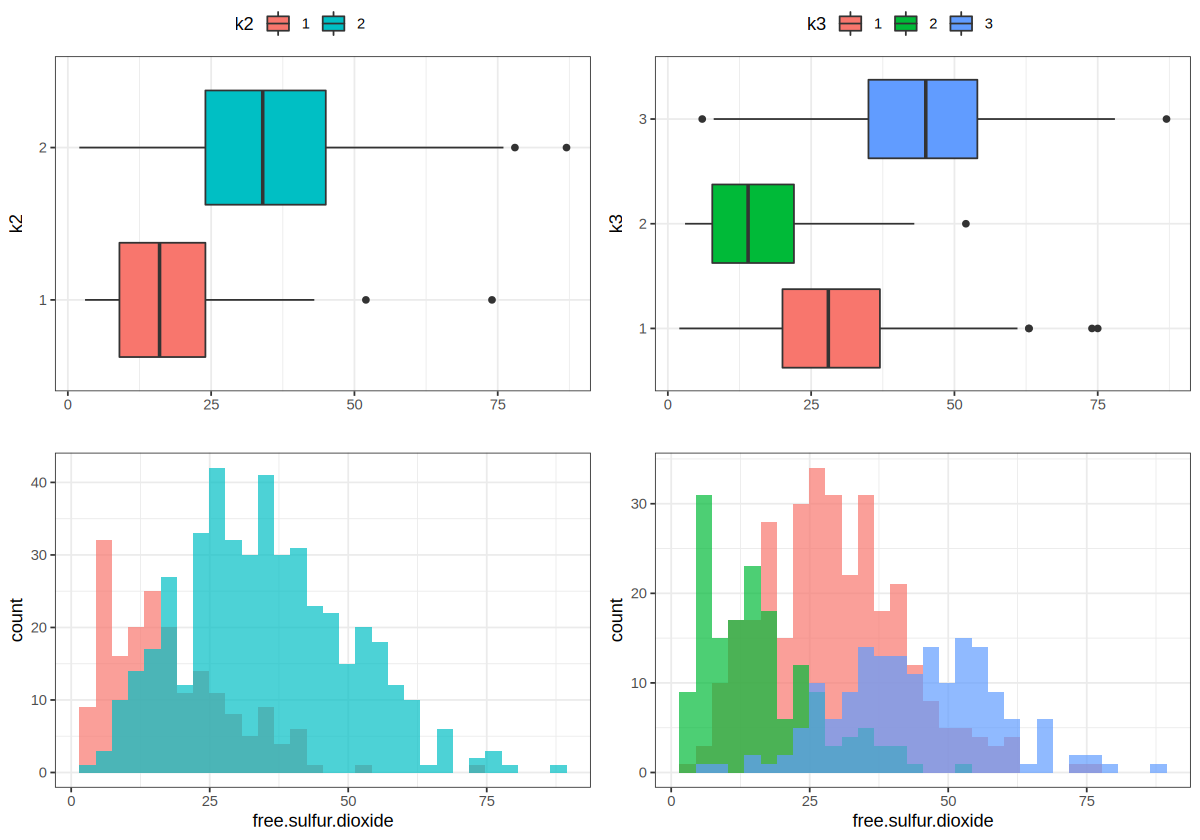

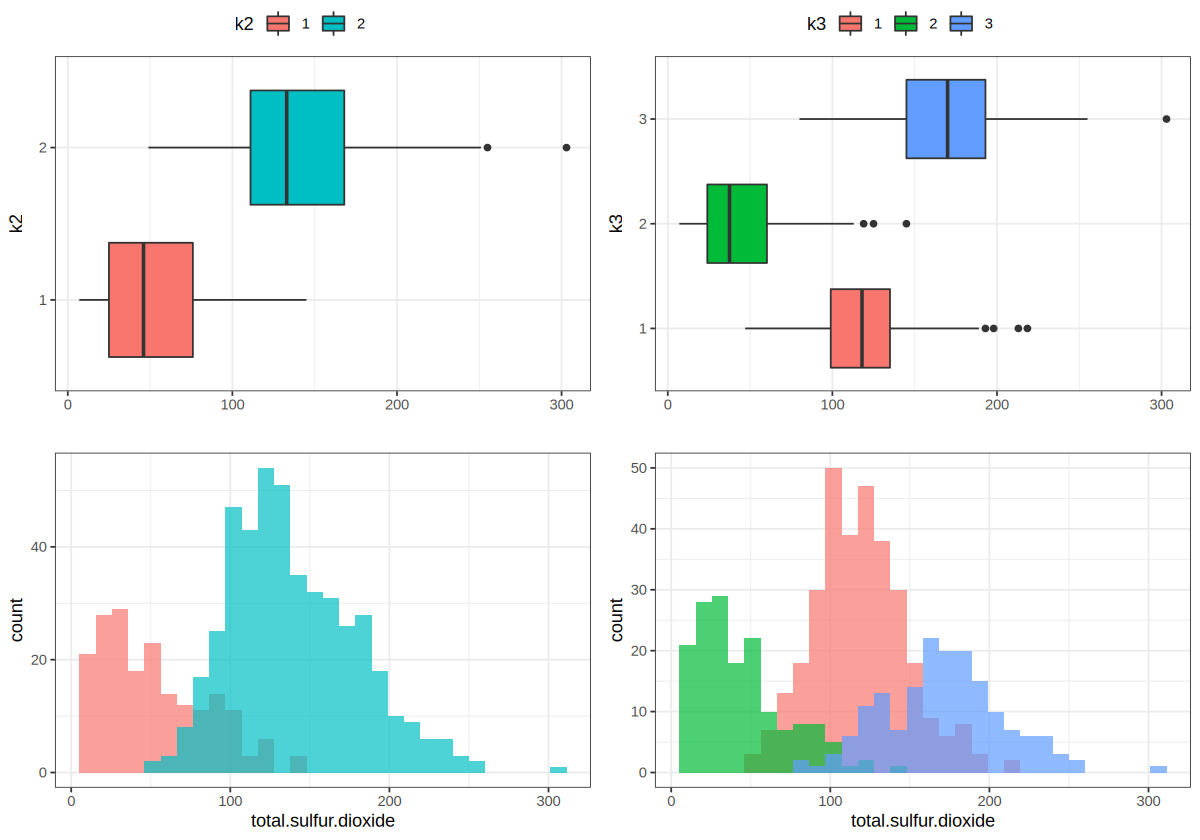

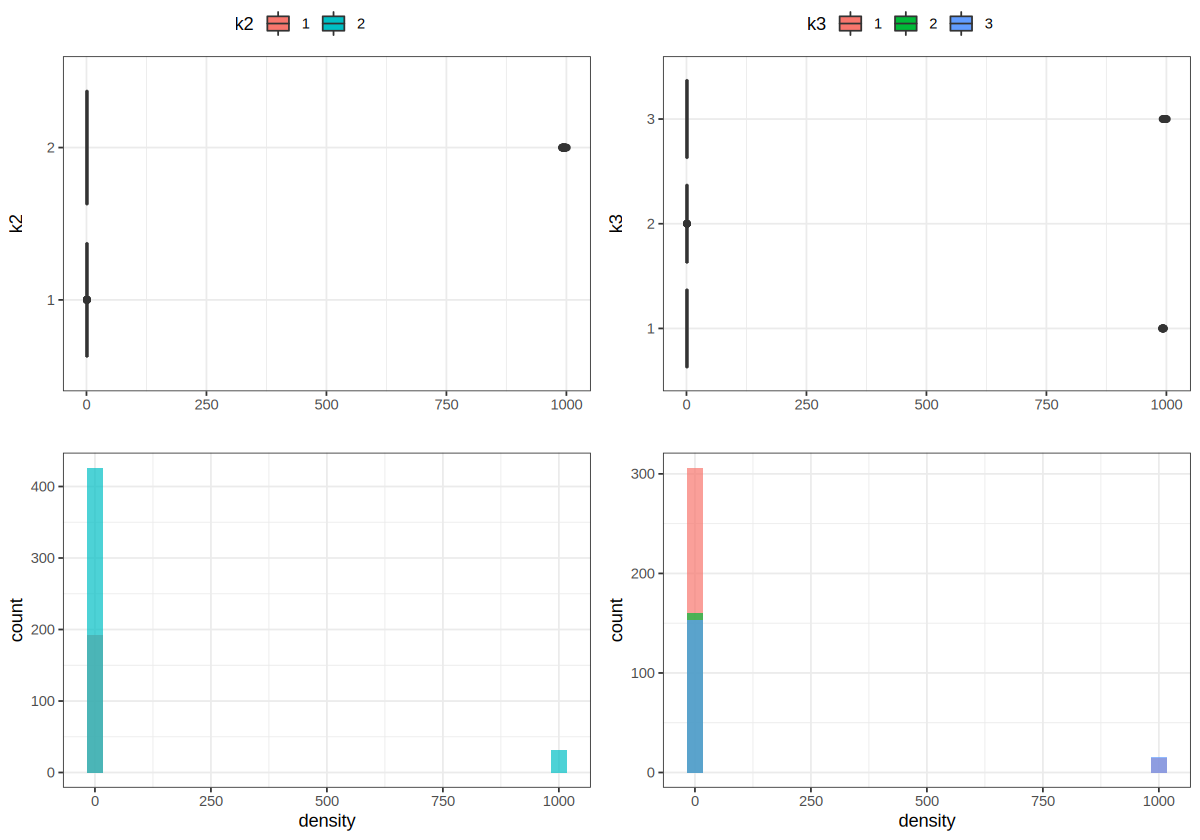

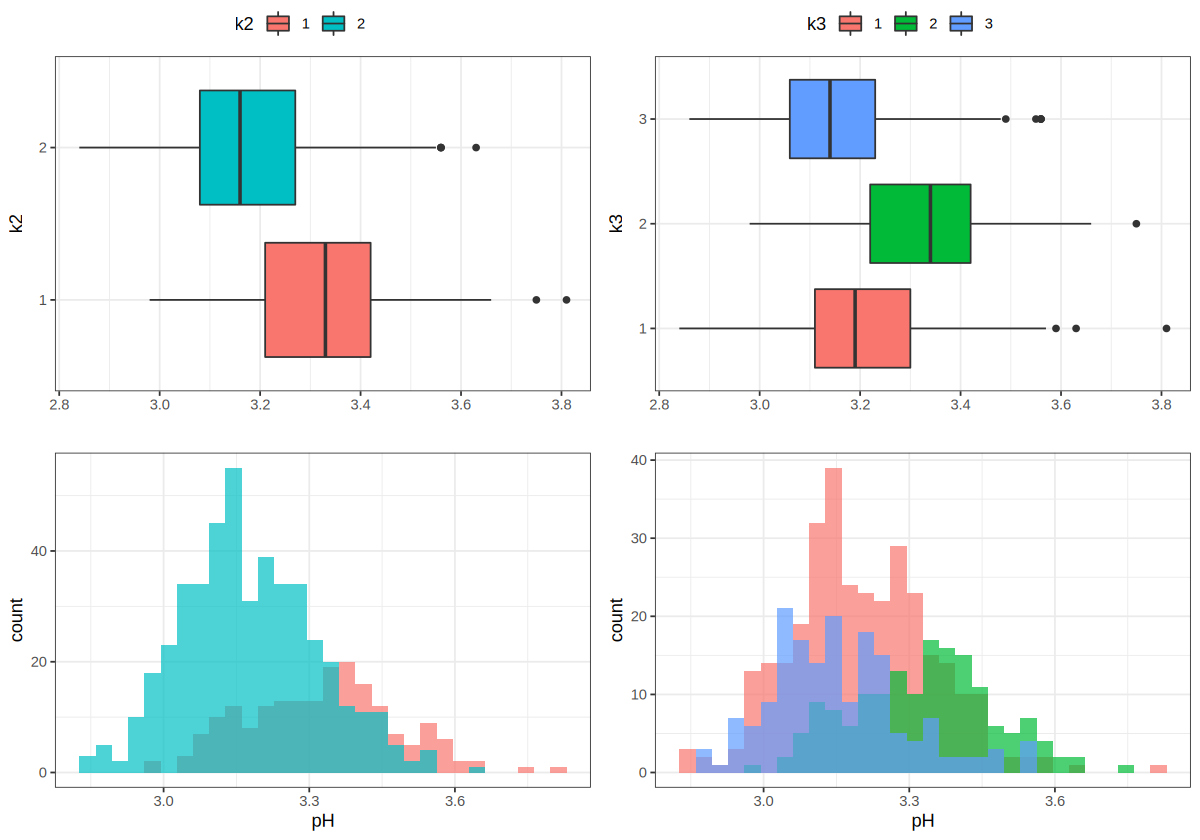

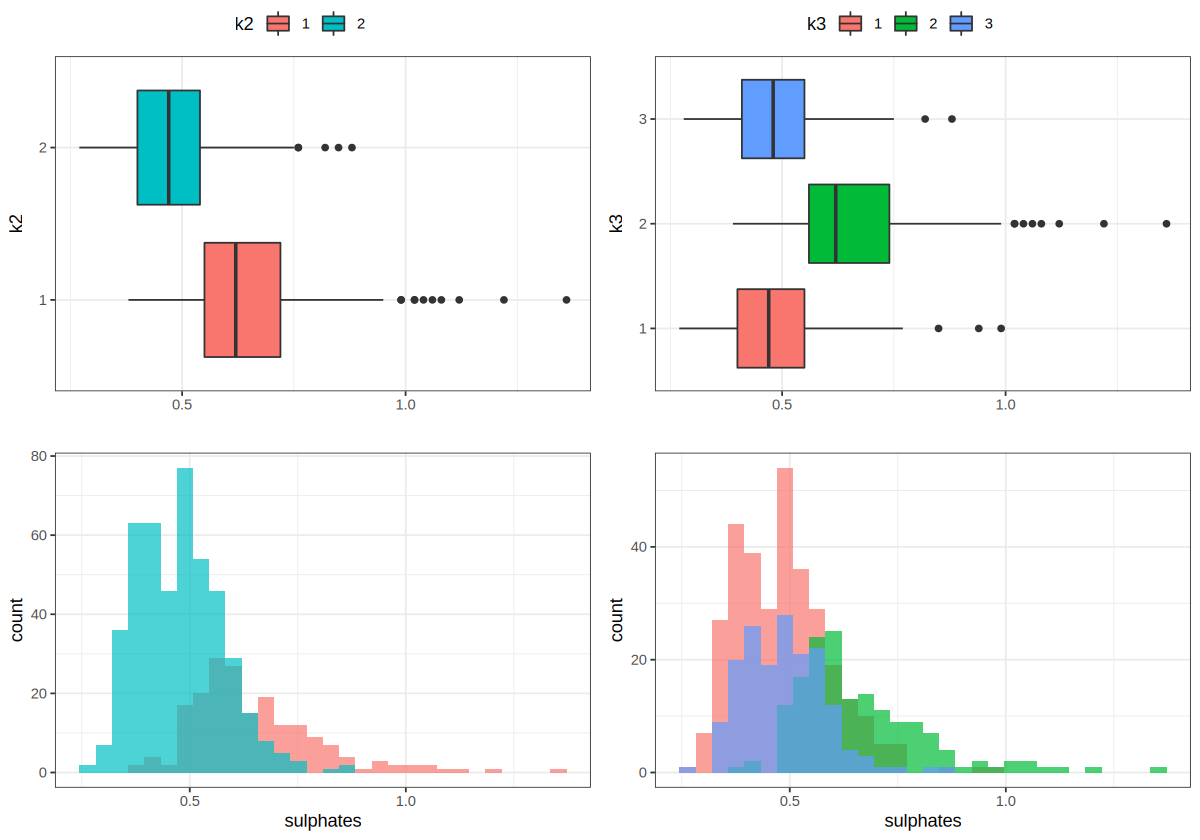

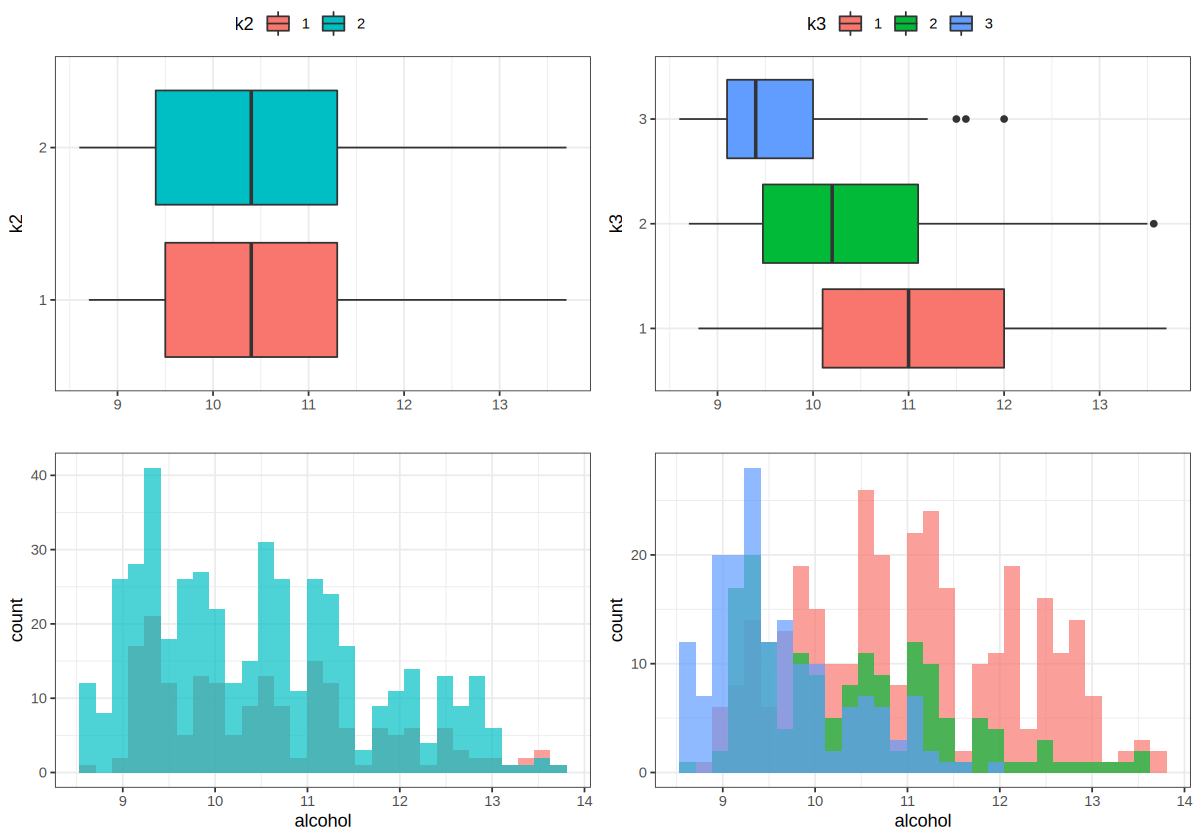

In [42]:
options(repr.plot.width = 10, repr.plot.height = 7)
for(variable in colnames(df[, 1:11])){
    print(
        ggarrange(
            createFig(variable, 'k2'),
            createFig(variable, 'k3'),
            nrow = 1, ncol = 2,
            align = 'hv'
        )
    )
}
options(repr.plot.width = 7, repr.plot.height = 7)

In [49]:
res.pca <- PCA(df[, 1:11], scale.unit = TRUE, ncp = 7)
scores <- get_pca_ind(res.pca)$coord
loadings <- get_pca_var(res.pca)$coord

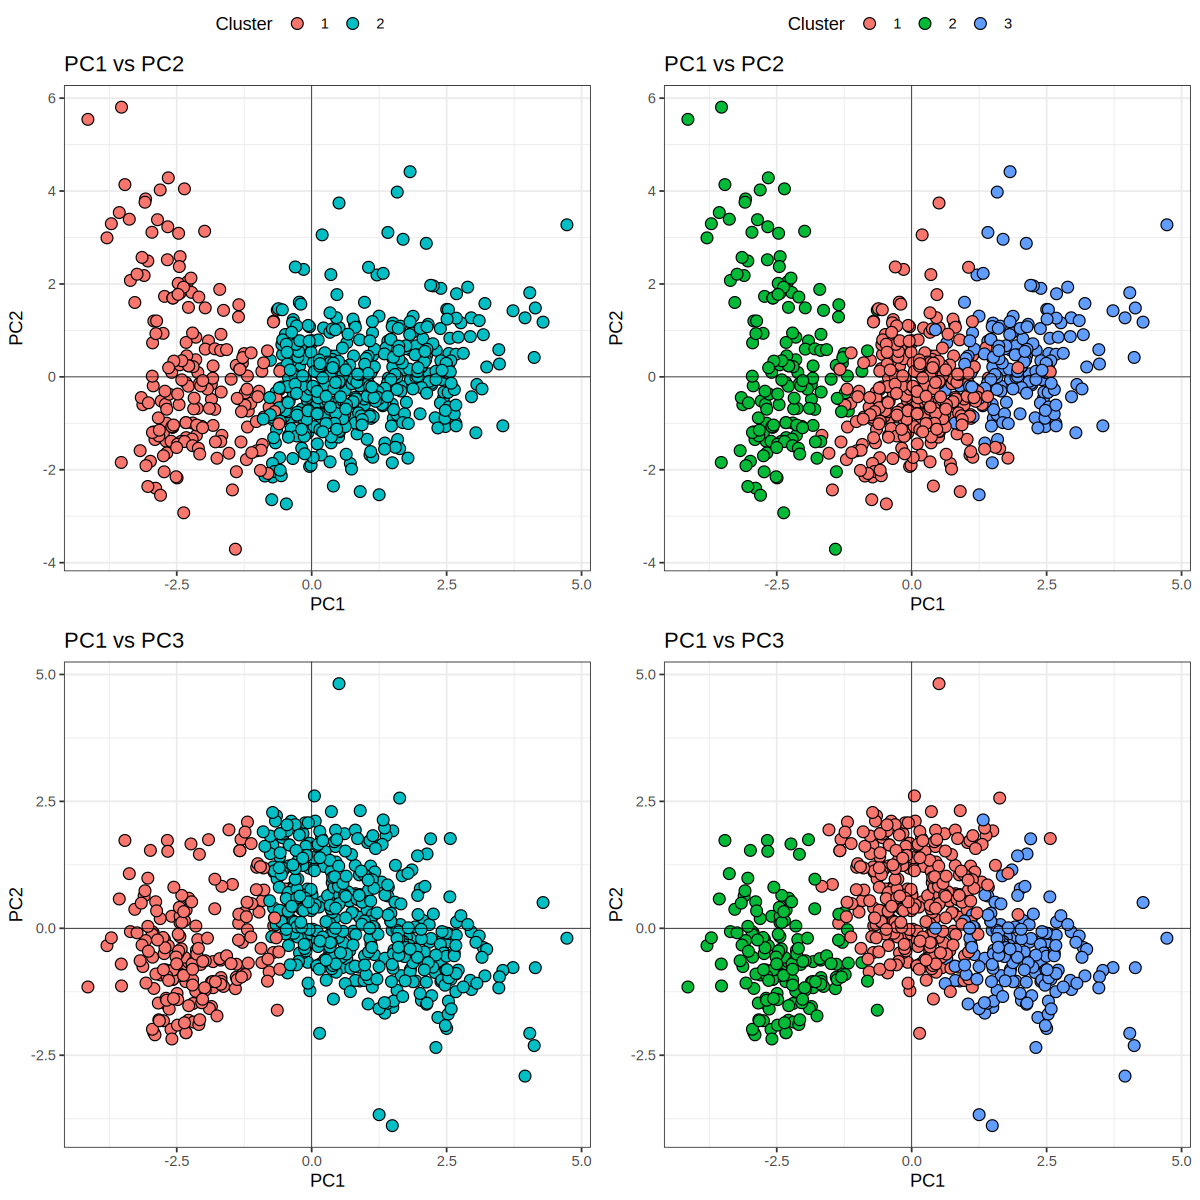

In [68]:
g1 <- ggplot(as.data.frame(scores), aes(x = Dim.1, y = Dim.2)) +
        geom_point(aes(fill = df$k2), color = 'black', shape = 21, size = 3) +
        geom_hline(yintercept = 0, linetype = "solid", color = "black", size = .2) +
        geom_vline(xintercept = 0, linetype = "solid", color = "black", size = .2) +
        theme_bw() + 
        theme(legend.position = 'top') +
        labs(title = 'PC1 vs PC2', fill = 'Cluster') +
        xlab('PC1') + 
        ylab('PC2')
g2 <- ggplot(as.data.frame(scores), aes(x = Dim.1, y = Dim.2)) +
        geom_point(aes(fill = df$k3), color = 'black', shape = 21, size = 3) +
        geom_hline(yintercept = 0, linetype = "solid", color = "black", size = .2) +
        geom_vline(xintercept = 0, linetype = "solid", color = "black", size = .2) +
        theme_bw() + 
        theme(legend.position = 'top') +
        labs(title = 'PC1 vs PC2', fill = 'Cluster') +
        xlab('PC1') + 
        ylab('PC2')
g3 <- ggplot(as.data.frame(scores), aes(x = Dim.1, y = Dim.3)) +
        geom_point(aes(fill = df$k2), color = 'black', shape = 21, size = 3) +
        geom_hline(yintercept = 0, linetype = "solid", color = "black", size = .2) +
        geom_vline(xintercept = 0, linetype = "solid", color = "black", size = .2) +
        theme_bw() + 
        theme(legend.position = 'top') +
        labs(title = 'PC1 vs PC3', fill = 'Cluster') +
        xlab('PC1') + 
        ylab('PC2')
g4 <- ggplot(as.data.frame(scores), aes(x = Dim.1, y = Dim.3)) +
        geom_point(aes(fill = df$k3), color = 'black', shape = 21, size = 3) +
        geom_hline(yintercept = 0, linetype = "solid", color = "black", size = .2) +
        geom_vline(xintercept = 0, linetype = "solid", color = "black", size = .2) +
        theme_bw() + 
        theme(legend.position = 'top') +
        labs(title = 'PC1 vs PC3', fill = 'Cluster') +
        xlab('PC1') + 
        ylab('PC2')

options(repr.plot.width = 10, repr.plot.height = 10)
ggarrange(
    ggarrange(g1, g3, nrow = 2, ncol = 1, common.legend = TRUE, legend = 'top', align = 'hv'),
    ggarrange(g2, g4, nrow = 2, ncol = 1, common.legend = TRUE, legend = 'top', align = 'hv'), 
    ncol = 2, nrow = 1, align = 'hv'
)


In [69]:
save.image()